In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import matplotlib.pyplot as plt

In [24]:
# Veri setini DataFrame olarak oluşturma
data = pd.read_excel("example3.xlsx")

In [25]:
df = pd.DataFrame(data)

In [26]:
#Veri etiketleme
df["Level"] = df["Level"].map({"Highschool": 0, "Bsc": 1, "Msc": 2})

In [27]:
df["Type"] = df["Type"].map({"Online": 0, "Facetoface": 1})

In [28]:
print(df.head())

   Age  Level  Type  Satisfaction  Performance  Time
0   42      2     1             5           50     1
1   28      2     1             4          100     1
2   48      1     0             3           27     2
3   33      0     0             1           16     3
4   37      0     0             2           22     4


In [29]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y) seçimi
X = df[["Age", "Level", "Type", "Satisfaction","Performance"]]
y = df["Time"]

In [30]:
# Veri seti eğitim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# SVM modelini oluşturma ve eğitme
model = SVC(kernel='linear')  # Lineer çekirdek kullanıyoruz
model.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
# Modelin performansını değerlendirme
# Eğitim ve test veri setleri üzerinde tahmin yapma
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Eğitim ve test veri setleri için doğruluk oranı hesaplama
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
r2_accuracy_train = r2_score(y_train, y_train_pred)
r2_accuracy_test = r2_score(y_test, y_test_pred)


print('Eğitim Seti Doğruluk Oranı:', accuracy_train)
print('Test Seti Doğruluk Oranı:', accuracy_test)
print('Eğitim Seti r2 Doğruluk Oranı:', r2_accuracy_train)
print('Test Seti r2 Doğruluk Oranı:', r2_accuracy_test)

Eğitim Seti Doğruluk Oranı: 0.8375
Test Seti Doğruluk Oranı: 0.7142857142857143
Eğitim Seti r2 Doğruluk Oranı: 0.8656330749354005
Test Seti r2 Doğruluk Oranı: 0.748


In [33]:
prediction = model.predict([[30,0,1,5,50]])
print('Prediction:', prediction)

Prediction: [2]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


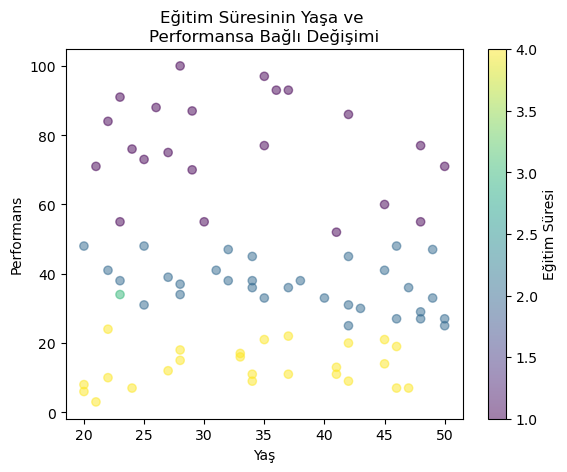

In [78]:
plt.scatter(X_train['Age'], X_train['Performance'], c=y_train_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Yaş')
plt.ylabel('Performans')
plt.title('Eğitim Süresinin Yaşa ve \nPerformansa Bağlı Değişimi')
plt.colorbar(label='Eğitim Süresi')
plt.show()


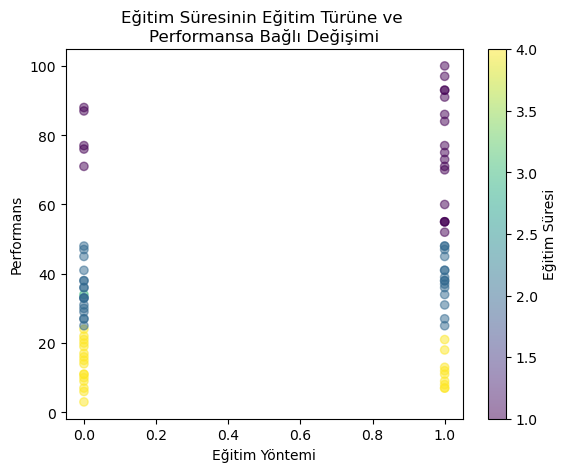

In [77]:
plt.scatter(X_train['Type'], X_train['Performance'], c=y_train_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Eğitim Yöntemi')
plt.ylabel('Performans')
plt.title('Eğitim Süresinin Eğitim Türüne ve \nPerformansa Bağlı Değişimi')
plt.colorbar(label='Eğitim Süresi')
plt.show()


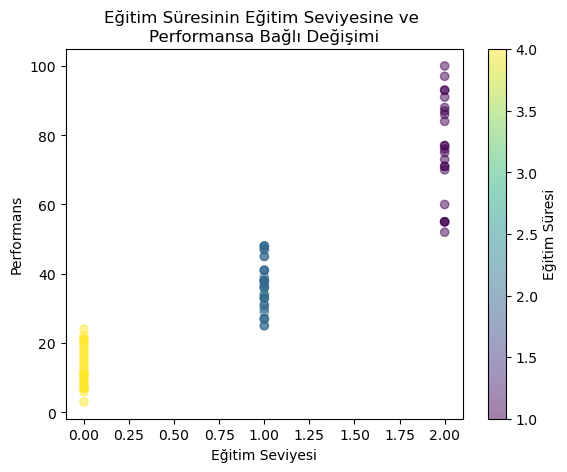

In [76]:
plt.scatter(X_train['Level'], X_train['Performance'], c=y_train_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Performans')
plt.title('Eğitim Süresinin Eğitim Seviyesine ve \nPerformansa Bağlı Değişimi')
plt.colorbar(label='Eğitim Süresi')
plt.show()


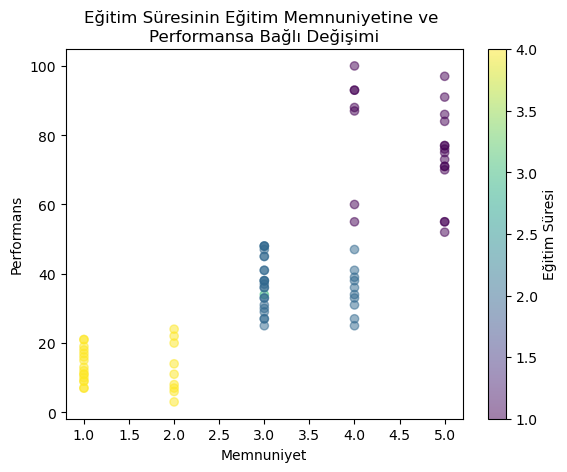

In [75]:
plt.scatter(X_train['Satisfaction'], X_train['Performance'], c=y_train_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Memnuniyet')
plt.ylabel('Performans')
plt.title('Eğitim Süresinin Eğitim Memnuniyetine ve \nPerformansa Bağlı Değişimi')
plt.colorbar(label='Eğitim Süresi')
plt.show()


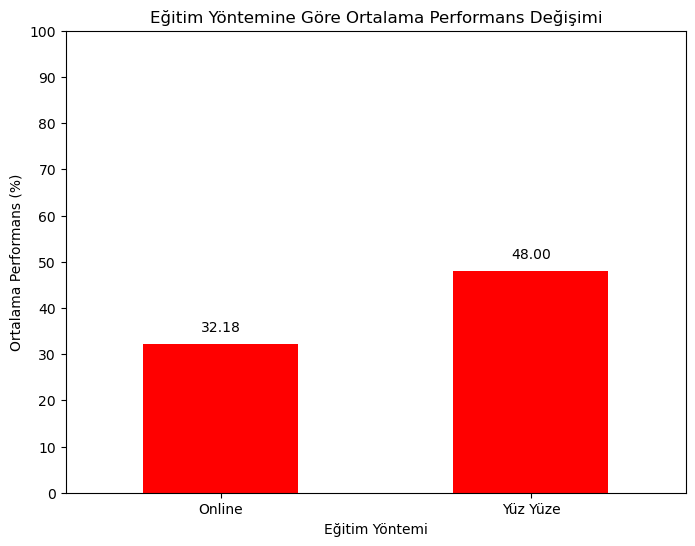

In [68]:
import matplotlib.pyplot as plt

# 'Type' özniteliğine göre performansın ortalamasını hesaplama
performance_means = X_train.groupby('Type')['Performance'].mean()

# Performansa bağlı sütun grafiğini çizdirme
plt.figure(figsize=(8, 6))
bar_plot = performance_means.plot(kind='bar', color='red')
plt.xlabel('Eğitim Yöntemi')
plt.ylabel('Ortalama Performans (%)')
plt.title('Eğitim Yöntemine Göre Ortalama Performans Değişimi')
plt.yticks(range(0, 101, 10))  # Y eksenindeki etiketleri 0'dan 100'e 10'ar 10'ar artırarak belirleme
plt.xticks(range(len(performance_means.index)), ['Online', 'Yüz Yüze'], rotation=0)  # X eksenindeki etiketleri değiştirme ve 45 derece döndürme

# Sütunların üzerine net değerlerini yazdırma
for i, mean in enumerate(performance_means):
    plt.text(i, mean + 2, f'{mean:.2f}', ha='center', va='bottom')

plt.show()
